In [4]:
import pandas as pd
names = ['Index','URL', 'Category']
df = pd.read_csv('E:/Mayur/Sem 5/Python project/project/URL Classification.csv', names=names, na_filter=False)

In [ ]:
print('Arts ', len(df[df['Category']=='Arts']))
print('Business ', len(df[df['Category']=='Business']))
print('Computers ', len(df[df['Category']=='Computers']))
print('Games ', len(df[df['Category']=='Games']))
print('Health ', len(df[df['Category']=='Health']))
print('Home ', len(df[df['Category']=='Home']))
print('Kids ', len(df[df['Category']=='Kids']))
print('News ', len(df[df['Category']=='News']))
print('Recreation ', len(df[df['Category']=='Recreation']))
print('Reference ', len(df[df['Category']=='Reference']))
print('Science ', len(df[df['Category']=='Science']))
print('Shopping ', len(df[df['Category']=='Shopping']))
print('Society ', len(df[df['Category']=='Society']))
print('Sports ', len(df[df['Category']=='Sports']))

In [5]:
#category wise data splitting for training

df_arts = df[1:40001]
df_business = df[253842:293842]
df_computers = df[494018:534018]
df_games = df[611981:651981]
df_health = df[668458:708458]
df_home = df[728555:756555]
df_kids = df[756824:796824]
df_news = df[803006:811006]
df_recreation = df[811995:851995]
df_reference = df[918581:958581]
df_science = df[976828:1016828]
df_shopping = df[1087114:1127114]
df_society = df[1182384:1222384]
df_sports = df[1426327:1466333]

dt = pd.concat([df_arts, df_business, df_computers, df_games, df_health, df_home, df_kids, df_news, df_recreation, df_reference, df_science, df_shopping, df_society, df_sports], axis=0)
dt.head()

,Index,URL,Category
1,35327,http://animation.about.com/,Arts
2,35328,http://www.toonhound.com,Arts
3,35329,http://www.geocities.com/d-patanella/,Arts
4,35330,http://enculturation.gmu.edu/2_1/pisters.html,Arts
5,35331,http://www.digitalmediafx.com/features/animati...,Arts


In [ ]:
print('Arts ', len(dt[dt['Category']=='Arts']))
print('Business ', len(dt[dt['Category']=='Business']))
print('Computers ', len(dt[dt['Category']=='Computers']))
print('Games ', len(dt[dt['Category']=='Games']))
print('Health ', len(dt[dt['Category']=='Health']))
print('Home ', len(dt[dt['Category']=='Home']))
print('Kids ', len(dt[dt['Category']=='Kids']))
print('News ', len(dt[dt['Category']=='News']))
print('Recreation ', len(dt[dt['Category']=='Recreation']))
print('Reference ', len(dt[dt['Category']=='Reference']))
print('Science ', len(dt[dt['Category']=='Science']))
print('Shopping ', len(dt[dt['Category']=='Shopping']))
print('Society ', len(dt[dt['Category']=='Society']))
print('Sports ', len(dt[dt['Category']=='Sports']))

In [6]:
dt[dt['Category']=='Computers'].head()

,Index,URL,Category
494018,123,https://mail.google.com/mail/u/0/#inbox,Computers
494019,123,https://drive.google.com/drive/,Computers
494020,123,https://drive.google.com/drive/,Computers
494021,123,https://www.javatpoint.com/,Computers
494022,234,https://www.tutorialspoint.com/index.htm,Computers


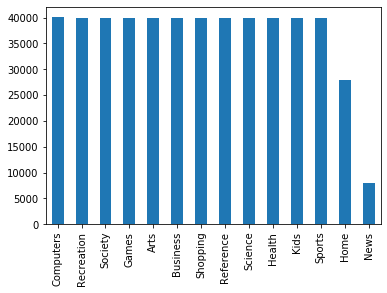

In [7]:
import matplotlib as plt
%matplotlib inline
dt['Category'].value_counts().plot(kind='bar')

In [8]:
x_test = dt['URL']
y_test = dt['Category']

x_train = df['URL']
y_train = df['Category']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(x_test, y_test)

In [ ]:
# text_clf.predict(['http://www.india.com/'])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search, cv=5)
gs_clf = gs_clf.fit(x_test, y_test)

In [ ]:
gs_clf.predict(['http://www.amazon.com/'])

In [ ]:
# from sklearn import metrics
# metrics.accuracy_score(y_train,gs_clf.predict(x_train))

In [ ]:
# from sklearn import metrics
# metrics.accuracy_score(y_test,gs_clf.predict(x_test))

In [ ]:
# import pickle

# pickle.dump(gs_clf,open('E:/Mayur/Sem 5/Python project/final_model.pickle','wb'))

In [ ]:
# from klepto.archives import dir_archive

# model = dir_archive('E:/Mayur/Sem 5/Python project/model_klepto3',{'result':gs_clf},serialized=True, cached=True)
# model.dump()

In [ ]:
# demo = dir_archive('E:/Mayur/Sem 5/Python project/model_klepto3', {}, serialized=True, cached=True)

In [ ]:
# demo.load()

In [ ]:
# demo['result'].predict(['http://www.github.com/'])

In [ ]:
import joblib
model_joblib = joblib.dump(gs_clf, open('E:/Mayur/Sem 5/Python project/project/model_joblib2','wb'), compress=9)

In [ ]:
joblib_load = joblib.load(open('E:/Mayur/Sem 5/Python project/project/model_joblib','rb'))
joblib_load.predict(['http://www.github.com/'])